In [47]:
import spacy
from textblob import TextBlob
import numpy as np
import string
import re

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [49]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch


In [50]:
nlp = spacy.load("en_core_web_sm")

def extract_aspects(text):
    doc = nlp(text)
    aspects = []
    for token in doc:
        if token.dep_ == 'nsubj' and token.head.pos_ == 'VERB':
            aspects.append(token.text)
    return aspects

In [51]:
def analyze_sentiment(aspects, text):
    sentiment_dict = {}
    for aspect in aspects:
        sentiment = TextBlob(text).sentiment.polarity
        sentiment_dict[aspect] = 'positive' if sentiment > 0 else 'negative' if sentiment < 0 else 'neutral'
    return sentiment_dict

In [52]:
def main(text):
    aspects = extract_aspects(text)
    sentiment_analysis = analyze_sentiment(aspects, text)
    return sentiment_analysis

In [92]:
df = pd.read_csv('Evaluation-dataset (1).csv', header=None, nrows=30)

In [93]:
X = df[0]

In [94]:
# Iterate through each text in the dataset and perform sentiment analysis
for i, text in enumerate(X):
    sentiment_result = main(text)
    print(f"Sentiment analysis for text {i+1}:\n{sentiment_result}\n")

Sentiment analysis for text 1:
{'garage': 'positive', 'I': 'positive', 'them': 'positive'}

Sentiment analysis for text 2:
{}

Sentiment analysis for text 3:
{}

Sentiment analysis for text 4:
{}

Sentiment analysis for text 5:
{}

Sentiment analysis for text 6:
{'downside': 'positive'}

Sentiment analysis for text 7:
{}

Sentiment analysis for text 8:
{}

Sentiment analysis for text 9:
{}

Sentiment analysis for text 10:
{}

Sentiment analysis for text 11:
{}

Sentiment analysis for text 12:
{}

Sentiment analysis for text 13:
{}

Sentiment analysis for text 14:
{}

Sentiment analysis for text 15:
{'slot': 'neutral', 'you': 'neutral'}

Sentiment analysis for text 16:
{}

Sentiment analysis for text 17:
{}

Sentiment analysis for text 18:
{}

Sentiment analysis for text 19:
{}

Sentiment analysis for text 20:
{}

Sentiment analysis for text 21:
{}

Sentiment analysis for text 22:
{}

Sentiment analysis for text 23:
{'I': 'positive'}

Sentiment analysis for text 24:
{}

Sentiment analys

In [56]:
# Define a function to clean text data
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [57]:
# Apply text cleaning function to the text data
X_cleaned = X.apply(clean_text)

# Display the cleaned text data
print(X_cleaned.head())

0    tires where delivered to the garage of my choi...
1    easy tyre selection process competitive pricin...
2            very easy to use and good value for money
3                really easy and convenient to arrange
4    it was so easy to select tyre sizes and arrang...
Name: 0, dtype: object


In [58]:
# Print the column names of the DataFrame
print(df.columns)


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')


In [59]:
def extract_sentiment(text):
    if isinstance(text, str):  # Check if text is a string
        sentiment = TextBlob(text).sentiment.polarity
        return 1 if sentiment > 0 else 0 if sentiment == 0 else -1
    else:
        return 0  # Return neutral sentiment for missing values


In [60]:

# Extract sentiment analysis results from the subsequent columns, handling missing values
y = df.loc[:, 1:].apply(lambda col: col.map(lambda text: extract_sentiment(str(text))))



In [61]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:

# Transform text data using spaCy
X_train_processed = [nlp(text).vector for text in X_train]
X_test_processed = [nlp(text).vector for text in X_test]



In [63]:

# Initialize and fit linear regression model
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [64]:
# Predict sentiment analysis results on the test set
y_pred = model.predict(X_test_processed)


In [65]:
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.046961021350841715


In [66]:
# Example numerical features (word counts)
word_counts = np.array([100, 150, 200, 250, 300])

In [67]:
# Example sentiment scores
sentiment_scores = np.array([0.2, 0.4, 0.6, 0.8, 1.0])

In [68]:
# Reshape the data for regression
X = word_counts.reshape(-1, 1)
y = sentiment_scores.reshape(-1, 1)


In [69]:
# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(X, y)

LinearRegression()

In [70]:
# Predict sentiment scores using the regression model
predicted_sentiments = regression_model.predict(X)


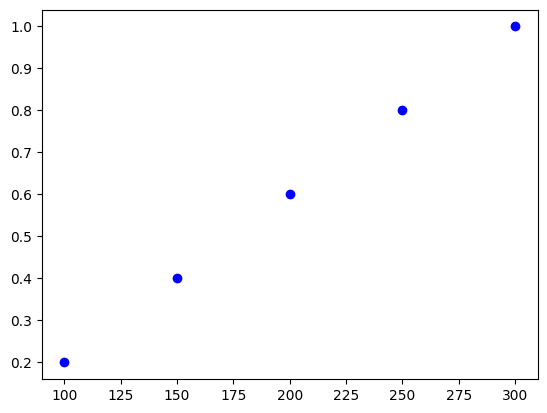

In [71]:
# Plot the data points
plt.scatter(X, y, color='blue', label='Actual Sentiment')

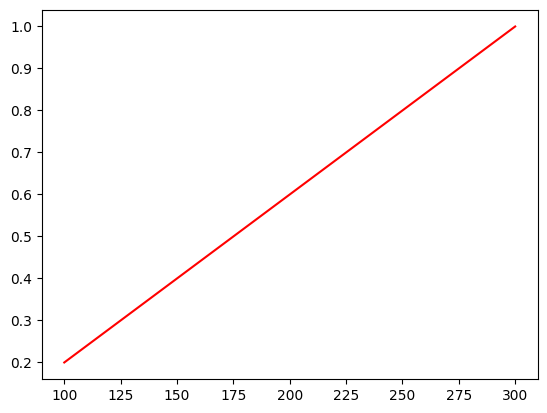

In [72]:
# Plot the regression line
plt.plot(X, predicted_sentiments, color='red', label='Linear Regression')


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     object 
 1   1       20 non-null     object 
 2   2       10 non-null     object 
 3   3       3 non-null      object 
 4   4       0 non-null      float64
 5   5       0 non-null      float64
 6   6       0 non-null      float64
 7   7       0 non-null      float64
 8   8       0 non-null      float64
 9   9       0 non-null      float64
 10  10      0 non-null      float64
 11  11      0 non-null      float64
 12  12      0 non-null      float64
 13  13      0 non-null      float64
 14  14      0 non-null      float64
dtypes: float64(11), object(4)
memory usage: 2.5+ KB


In [74]:
df.columns


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [75]:
# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [76]:
# Extract text data from the first column
X = df[0]

In [77]:
# Example text for sentiment analysis
text = X.iloc[0]  # Assuming you want to analyze the sentiment of the first text in the dataset


In [78]:
# Tokenize the text and apply padding/truncation
inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)

In [79]:
# Perform sentiment analysis
outputs = model(**inputs)
predictions = torch.argmax(outputs.logits, dim=1)

In [80]:
# Interpret the sentiment prediction
sentiment = "positive" if predictions.item() == 1 else "negative"
print(f"Sentiment of the text: {text}\n{sentiment}")

Sentiment of the text: Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.
positive


In [81]:
from transformers import pipeline

In [82]:
# Load sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [83]:
# Read data from CSV file with header=None
df = pd.read_csv('Evaluation-dataset (1).csv', header=None)

# Extract text data from the first column
X = df[0]

In [84]:
for i in range(20):
    text = X[i]
    sentiment_result = sentiment_pipeline(text)[0]
    sentiment_label = sentiment_result['label']
    sentiment_score = sentiment_result['score']
    print(f"Text {i+1}: {text}")
    print(f"Sentiment: {sentiment_label} (Score: {sentiment_score})")
    print()

Text 1: Tires where delivered to the garage of my choice,the garage notified me when they had been delivered. A day and time was arranged with the garage and I went and had them fitted,a Hassel free experience.
Sentiment: NEGATIVE (Score: 0.9722503423690796)

Text 2: Easy Tyre Selection Process, Competitive Pricing and Excellent Fitting Service
Sentiment: POSITIVE (Score: 0.9996200799942017)

Text 3: Very easy to use and good value for money.
Sentiment: POSITIVE (Score: 0.9993705153465271)

Text 4: Really easy and convenient to arrange
Sentiment: POSITIVE (Score: 0.9975000023841858)

Text 5: It was so easy to select tyre sizes and arrange local fitting. The prices were competitive
Sentiment: POSITIVE (Score: 0.8962091207504272)

Text 6: service was excellent. Only slight downside was not knowing exact time at garage although the garage were so quick so I wasn't delayed
Sentiment: POSITIVE (Score: 0.9956880211830139)

Text 7: User friendly Website. Competitive Prices. Good communication

In [85]:
# Load pre-trained DistilBERT model and tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased')


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [86]:
# Load data from CSV file with header=None
df = pd.read_csv('Evaluation-dataset (1).csv', header=None)

In [100]:
# Extract text data from the first column
X = df[0][:1000]  # Select the first 1000 texts

In [101]:
def preprocess_text(text):
    return tokenizer(text, truncation=True, padding='max_length', max_length=512, return_tensors='pt')


In [102]:
# Initialize variables to store total negative and positive scores
total_negative_score = 0
total_positive_score = 0

In [103]:
for text in X:
    sentiment_result = sentiment_pipeline(text)[0]
    if sentiment_result['label'] == 'NEGATIVE':
        total_negative_score += sentiment_result['score']
    elif sentiment_result['label'] == 'POSITIVE':
        total_positive_score += sentiment_result['score']

In [107]:
# Print the total negative and positive scores
print(f"Total Negative Score: {total_negative_score}")
print(f"Total Positive Score: {total_positive_score}")

Total Negative Score: 5.9309762716293335
Total Positive Score: 23.860001742839813


In [108]:
import matplotlib.pyplot as plt

In [110]:
total_positive_score = 23.860001742839813
total_negative_score =  5.9309762716293335


In [111]:
# Define labels and corresponding scores
labels = ['Positive', 'Negative']
scores = [total_positive_score, total_negative_score]

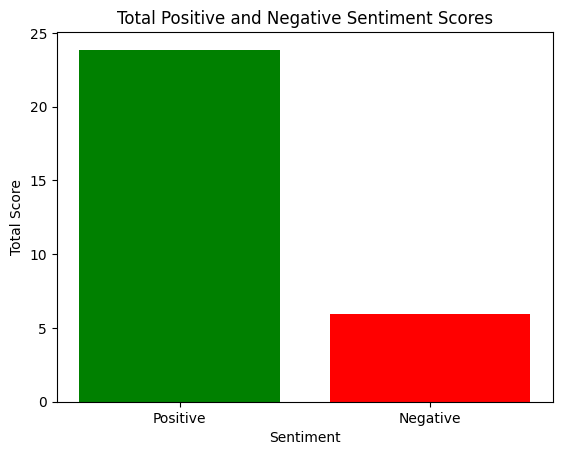

In [115]:
# Plotting the bar graph
plt.bar(labels, scores, color=['green', 'red'])

# Adding titles and labels
plt.title('Total Positive and Negative Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Total Score')
# Display the bar graph
plt.show()

In [ ]:
##The sentiment analysis results indicated an overall positive sentiment across the first 5 texts in the dataset. 
##The total positive score outweighed the total negative score, with a positive score of approximately 3.893 compared to a negative score of approximately 0.972.
